<a href="https://colab.research.google.com/github/victor048/Marketing-e-An-lise-de-Tr-fego/blob/main/Campanhas_de_Marketing_e_An%C3%A1lise_de_Tr%C3%A1fego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LinearRegression
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/KAG_conversion_data.csv')

In [ ]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [ ]:
df['ad_id'].value_counts()

1122303    1
1121141    1
1121131    1
1121132    1
1121133    1
          ..
1121723    1
1314372    1
1314359    1
1121716    1
1122304    1
Name: ad_id, Length: 1143, dtype: int64

In [ ]:
# mudando nome da coluna
df.rename(columns= {'ad_id':'id_anuncio','xyz_campaign_id':'id_campanha','fb_campaign_id':'id_fb_campanha','age':'idade','gender':'genero','interest':'interesse',
          'Impressions':'numero_excibicoes','Spent':'valor_pago','Total_Conversion':'conversao','Approved_Conversion':'compras'}, inplace=True)

In [ ]:
df.columns

Index(['id_anuncio', 'id_campanha', 'id_fb_campanha', 'idade', 'genero',
       'interesse', 'numero_excibicoes', 'Clicks', 'valor_pago', 'conversao',
       'compras'],
      dtype='object')

In [ ]:
# verificando colunas nulas
df.isnull().sum()

id_anuncio           0
id_campanha          0
id_fb_campanha       0
idade                0
genero               0
interesse            0
numero_excibicoes    0
Clicks               0
valor_pago           0
conversao            0
compras              0
dtype: int64

In [ ]:
df['compras'].value_counts()

0     559
1     403
2      86
3      35
4      24
6       7
5       7
8       5
10      4
7       4
9       3
14      2
21      1
17      1
13      1
12      1
Name: compras, dtype: int64

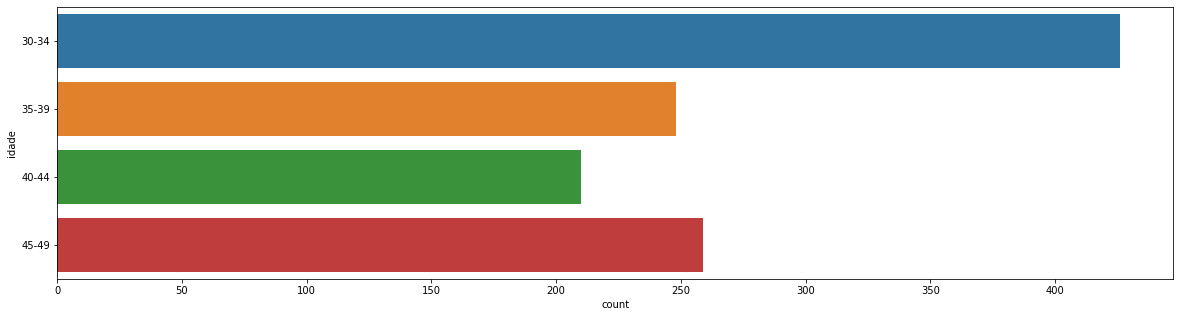

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y='idade', data=df)

In [ ]:
df['idade'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: idade, dtype: int64

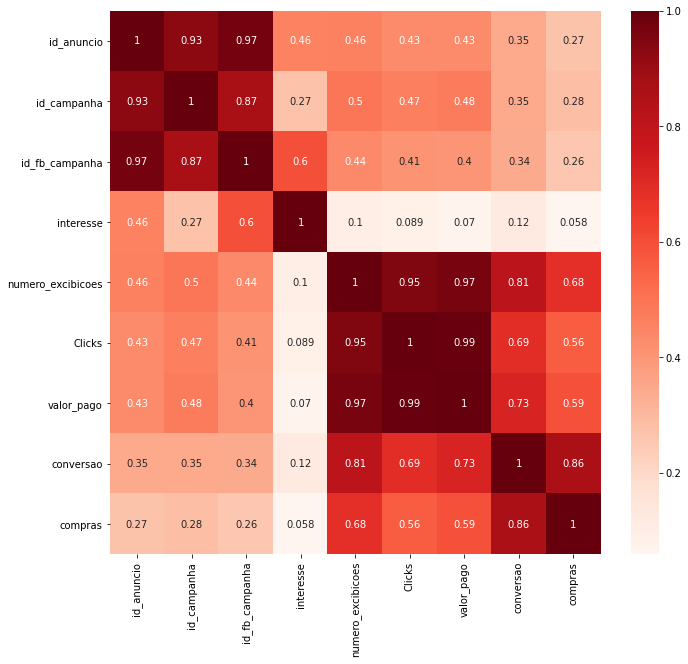

In [ ]:
# correlação de pearson
plt.figure(figsize=(11,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

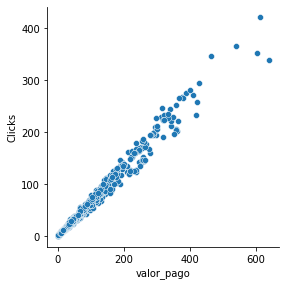

In [ ]:
# correlação entre valor_pago e quantidade de clicks
sns.pairplot(df, x_vars=['valor_pago'], y_vars=['Clicks'], height=4, kind='scatter')

In [ ]:
X = df['valor_pago']

In [ ]:
y = df['Clicks']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=100)

In [ ]:
X_train.head()

97      0.00
353     1.23
328     0.00
191    10.85
764    64.88
Name: valor_pago, dtype: float64

In [ ]:
y_train.head()

97      0
353     1
328     0
191     7
764    42
Name: Clicks, dtype: int64

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm = sm.add_constant(X_train)

In [ ]:
X_train_sm

,const,valor_pago
97,1.0,0.00
353,1.0,1.23
328,1.0,0.00
191,1.0,10.85
764,1.0,64.88
...,...,...
802,1.0,16.94
53,1.0,0.00
350,1.0,6.02
79,1.0,10.03


In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const        -0.065939
valor_pago    0.650235
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Clicks   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 5.440e+04
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:20:38   Log-Likelihood:                -2665.5
No. Observations:                 800   AIC:                             5335.
Df Residuals:                     798   BIC:                             5344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0659      0.281     -0.235      0.814      -0.617       0.485
valor_pago     0.6502      0.003    233.239      0.000       0.645       0.656
==============================================================================
Omnibus:                      172.801   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4505.613
Skew:                          -0.250   Prob(JB):                         0.00
Kurtosis:                      14.615   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# y = a*x + b

y_equacao = 0.6502 * X_train + -0.0659

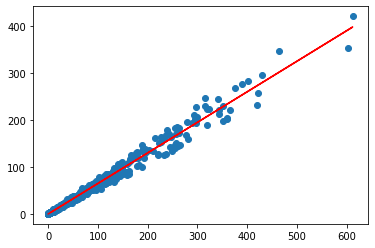

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_equacao, 'r')

In [ ]:
X_train.head()

97      0.00
353     1.23
328     0.00
191    10.85
764    64.88
Name: valor_pago, dtype: float64

In [ ]:
y_train.head()

97      0
353     1
328     0
191     7
764    42
Name: Clicks, dtype: int64

In [ ]:
# tamanho do treino
print(f'tamanho do treino: {len(X_train)}')
print(f'tamanho do test: {len(X_test)}')

tamanho do treino: 800
tamanho do test: 343


In [ ]:
# Tamanho do DataFrame
print(f'tamanho do test: {len(df)}')

tamanho do test: 1143


In [ ]:
if (len(df) == (len(X_train)+ len(X_test))):
  print('Tamanho OK')
else:
    print('Tamanho diferente')

Tamanho OK


In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# transformando em array para usar o fit acima^^
X_train = np.array(X_train).reshape(len(X_train), 1)
X_test = np.array(X_test).reshape(len(X_test), 1)
y_train = np.array(y_train).reshape(len(y_train), 1)
y_train = np.array(y_train).reshape(len(y_train), 1)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
model.coef_ # a > da equação

array([[0.65023522]])

In [ ]:
model.intercept_

array([-0.06593937])

In [ ]:
valor_investimento = 10

In [ ]:
model.predict([[valor_investimento]])

array([[3.18523675]])

In [ ]:
df.head(10)

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_excibicoes,Clicks,valor_pago,conversao,compras
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0
